# **2017 Full-field Data, Treatment III**
***Objective:* produce averaged normalized spectra over all lazurite particles per sample using mask**

### Program: 
[Jupyter notebook >=5.5, Python >=3.4]

### Input: 
- normalized full-field XANES spectral cubes, type = .hdf5, [dataset22] ()
> H600_norm.hdf
- mask images, type = .png, [dataset24] ()
> mask_mean_value_600Vpow_1_date.png

### Steps:
- follow script below

### Output:
- average spectra over particles, type = .txt (tab-delimited), [dataset25] ()
- *note:* x = indices, y = average normalized intensity
> H600_norm_wanted_particles_average_date.txt

### Notes:
- all comments are made with '##' 
- aspects that can be changed depending on the sample, etc. are with '#'

In [1]:
%pylab inline
import tables
import imageio
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from glob import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
figsize(16, 16)

In [3]:
##prepare output
date = datetime.datetime.now().strftime("%Y%m%d")
try:
    os.mkdir('dataset_25')
except OSError:
    pass

Start here for each new file import...

In [4]:
##import un-normalized H-600 file
filename = 'H600_norm.hdf'  ##for 600 C sample

filename = os.path.join('dataset_22', filename)
h5 = tables.open_file(filename)

In [5]:
##preparation for saving
basename, ext = os.path.splitext(os.path.basename(filename))
basename, ext

('H600_norm', '.hdf')

In [6]:
##for all normalized files
data = h5.root.data[:] ##for normalized data, hdf
data.shape  ##want (energy, spatial 1, spatial 2)

(2148, 1796, 140)

In [7]:
##additional for H-600 sample
##want energy axis first (all other samples had this arrangement already)
data_600 = data.transpose(2, 0, 1)
data_600.shape
#data_600.dtype

(140, 2148, 1796)

(2148, 1796)


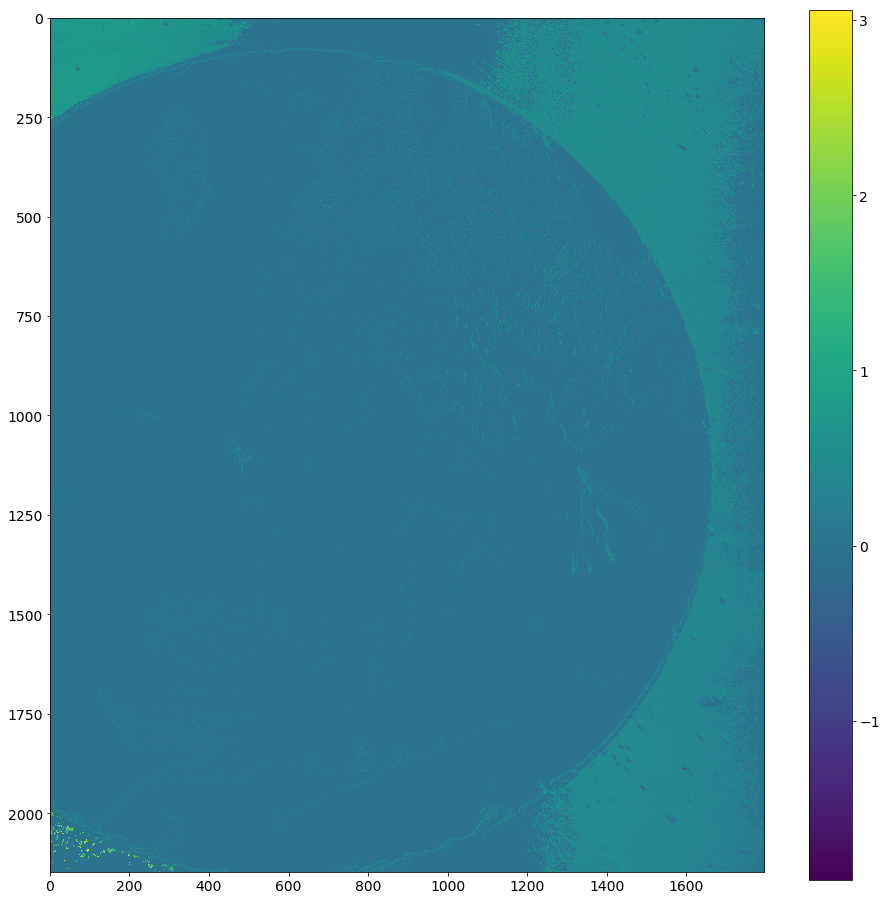

In [8]:
##calculates the mean intensity over all energies and displays as an image
mn = data_600.mean(axis=0)
print(mn.shape)
imshow(mn)
tmp = colorbar()

Move to folder where mask file is...

In [9]:
mask_files = glob(os.path.join('dataset_24', 'mask_mean_value_600Vpow_1_*.png')) ## look for masks
fname = mask_files[-1]  ## take the last one
fname

'dataset_24/mask_mean_value_600Vpow_1_20190702.png'

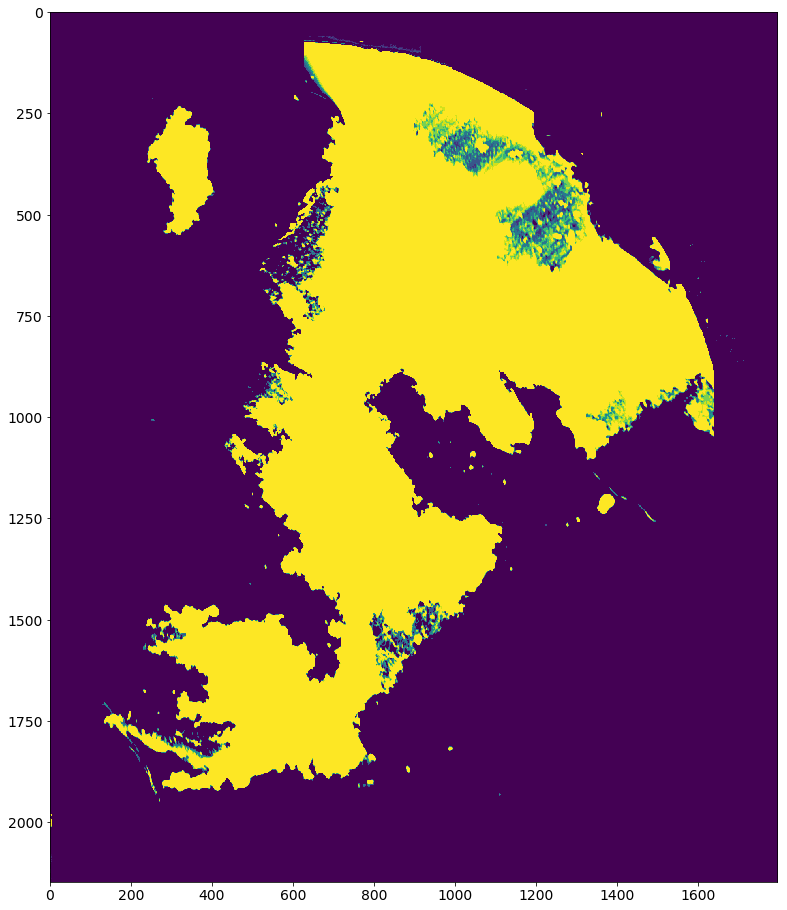

In [10]:
mask = imageio.imread(fname)
#mask.shape
tmp = imshow(mask[...,-1])

In [11]:
#mask.dtype
mask[...,-1].max(), mask[...,-1].min()

(255, 0)

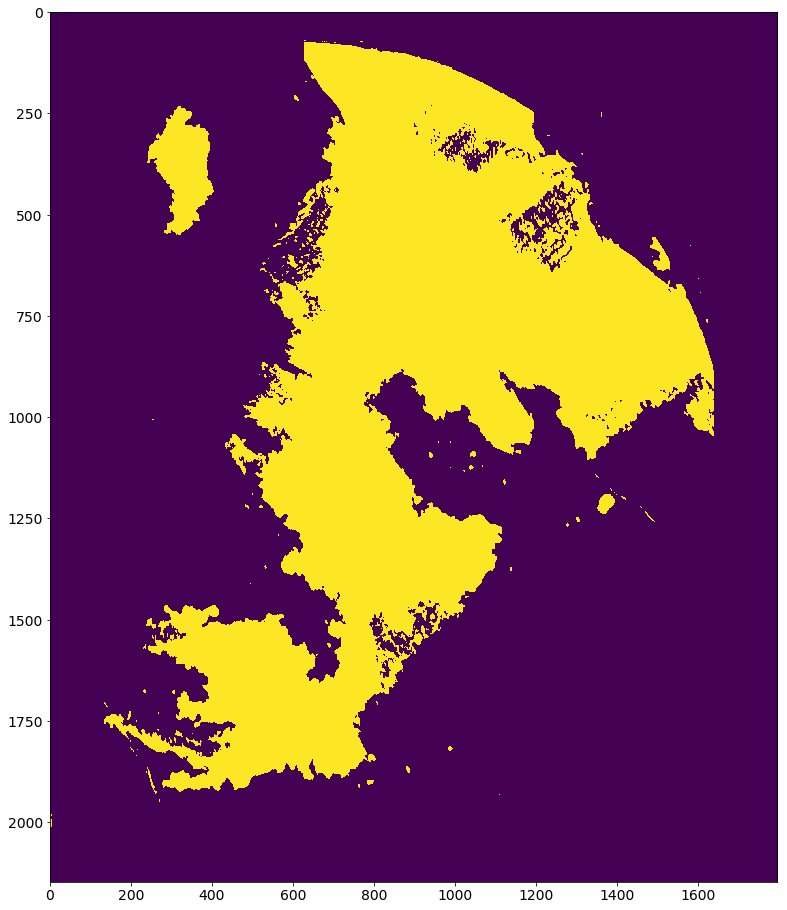

In [12]:
##making a boolean matrix for the last channel (-1, transparency) of the alpha channel where the value is >128
##128, because it's 8 bit, so 0 to 255 and 128 is halfway, so weaker signal assume is 0, and stronger signal assume is 1
wanted = mask[...,-1] > 128
#print(wanted) ##if you want to see it
tmp = imshow(wanted) ##only the particles

In [13]:
##need mask and data to be aligned, check shapes
##if first two dimensions (ie spatial dimensions) do not match, fix with transpose
##for H-600, they do already match
print(wanted.dtype)
print(wanted.shape)
print(data.shape) ##output shows it is already spatial 1 x spatial 2 x energy

bool
(2148, 1796)
(2148, 1796, 140)


In [14]:
##transposes so shapes are aligned
d = data  ## do not need to apply .transpose(1, 2, 0)
d.shape   ##should already match 'wanted' for first two dimensions

(2148, 1796, 140)

In [15]:
##selects all values in d that match wanted requirements, so all spectra whose mean gave an intensity >128 in image
#d[wanted].shape  ##just to see shape can write this way too, but also shown in two lines
wanted_data = d[wanted]
wanted_data.shape   ##(number of spectra meeting requirement, # of energies measured)

(1072361, 140)

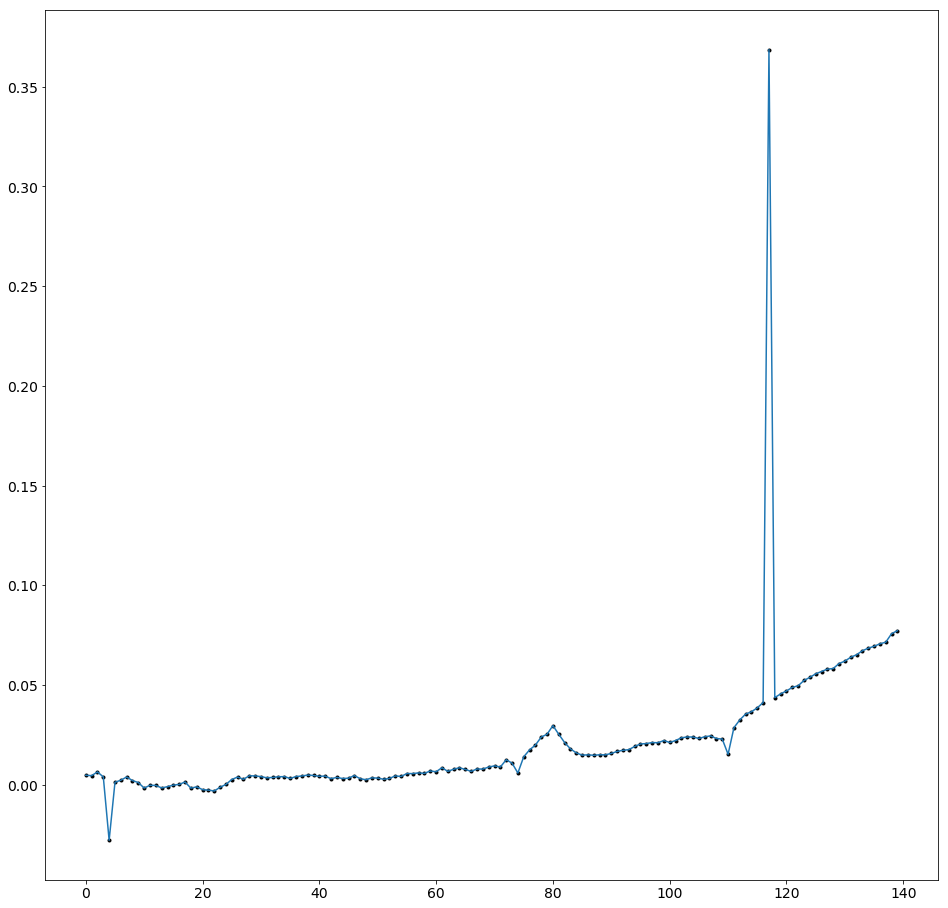

In [16]:
##plot of mean spectra over all particles
##where x = array of 140 ('wanted_data.shape[1]') and y = the mean over all selected spectra ('wanted_data.mean(axis=0)')
##the 1 calls axis = 1 in wanted_data.shape printed above
##axis = 0 calls the other postion but actually in wanted_data (not in .shape) those spectra meeting the requirement

wanted_data_mn = wanted_data.mean(axis=0)
plot(arange(wanted_data.shape[1]), wanted_data_mn, 'k.')  ##k. means black and dots
tmp = plt.plot(arange(wanted_data.shape[1]), wanted_data_mn)  ##gives the line over it

In [17]:
##making array of x values to save
x_data = np.arange(wanted_data.shape[1])
x_data

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139])

In [18]:
##array of data to save
frames = [pd.DataFrame(x_data), pd.DataFrame(wanted_data_mn)]
save_bits = pd.concat(frames, axis = 1)
save_bits

,0,0
0,0,0.004758
1,1,0.004584
2,2,0.006443
3,3,0.003941
4,4,-0.027827
5,5,0.001248
6,6,0.002292
7,7,0.003903
8,8,0.002100
9,9,0.001109


In [19]:
##saving csv of mean data 
savename = os.path.join('dataset_25', basename + '_wanted_particles_average_' + date + '.txt')
np.savetxt(savename, save_bits, delimiter ='\t')

### continue to sheet '07_2017FF_Treatment-IV...'